# Importing Libraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Importing Dataset

In [4]:
df_tracks=pd.read_csv("tracks.csv")
df_tracks.head()

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,Movie,Henri Salvador,C'est beau de faire un Show,0BRjO6ga9RKCKjfDqeFgWV,0,0.611,0.389,99373,0.910,0.000,C#,0.3460,-1.828,Major,0.0525,166.969,04-Apr,0.814
1,Movie,Martin & les fées,Perdu d'avance (par Gad Elmaleh),0BjC1NfoEOOusryehmNudP,1,0.246,0.590,137373,0.737,0.000,F#,0.1510,-5.559,Minor,0.0868,174.003,04-Apr,0.816
2,Movie,Joseph Williams,Don't Let Me Be Lonely Tonight,0CoSDzoNIKCRs124s9uTVy,3,0.952,0.663,170267,0.131,0.000,C,0.1030,-13.879,Minor,0.0362,99.488,05-Apr,0.368
3,Movie,Henri Salvador,Dis-moi Monsieur Gordon Cooper,0Gc6TVm52BwZD07Ki6tIvf,0,0.703,0.240,152427,0.326,0.000,C#,0.0985,-12.178,Major,0.0395,171.758,04-Apr,0.227
4,Movie,Fabien Nataf,Ouverture,0IuslXpMROHdEPvSl1fTQK,4,0.950,0.331,82625,0.225,0.123,F,0.2020,-21.150,Major,0.0456,140.576,04-Apr,0.390


# Identify the Total Number of Rows and Columns in the Dataset and Check the Data Type and Memory Usage

In [5]:
df_tracks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 232725 entries, 0 to 232724
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   genre             232725 non-null  object 
 1   artist_name       232725 non-null  object 
 2   track_name        232724 non-null  object 
 3   track_id          232725 non-null  object 
 4   popularity        232725 non-null  int64  
 5   acousticness      232725 non-null  float64
 6   danceability      232725 non-null  float64
 7   duration_ms       232725 non-null  int64  
 8   energy            232725 non-null  float64
 9   instrumentalness  232725 non-null  float64
 10  key               232725 non-null  object 
 11  liveness          232725 non-null  float64
 12  loudness          232725 non-null  float64
 13  mode              232725 non-null  object 
 14  speechiness       232725 non-null  float64
 15  tempo             232725 non-null  float64
 16  time_signature    23

# Cleaningup the Column Names

In [6]:
df_tracks.columns = df_tracks.columns.str.replace('_', ' ')

# Checking for Null/NaN Values in the Dataframe

In [7]:
pd.isnull(df_tracks).sum()

genre               0
artist name         0
track name          1
track id            0
popularity          0
acousticness        0
danceability        0
duration ms         0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
speechiness         0
tempo               0
time signature      0
valence             0
dtype: int64

# Replacing NaN Values in the DataFrame

In [8]:
df_tracks['track name'] = df_tracks['track name'].fillna(0)

In [9]:
pd.isnull(df_tracks).sum()

genre               0
artist name         0
track name          0
track id            0
popularity          0
acousticness        0
danceability        0
duration ms         0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
speechiness         0
tempo               0
time signature      0
valence             0
dtype: int64

# Checking for Duplicates in the Dataframe

In [10]:
df_tracks.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
232720    False
232721    False
232722    False
232723    False
232724    False
Length: 232725, dtype: bool

In [11]:
df_tracks.duplicated().sum()

0

# Observing Basic Data Properties

In [12]:
df_tracks.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
popularity,232725.0,41.127502,18.189948,0.00000,29.0000,43.000000,55.0000,100.000
acousticness,232725.0,0.368560,0.354768,0.00000,0.0376,0.232000,0.7220,0.996
danceability,232725.0,0.554364,0.185608,0.05690,0.4350,0.571000,0.6920,0.989
duration ms,232725.0,235122.339306,118935.909299,15387.00000,182857.0000,220427.000000,265768.0000,5552917.000
energy,232725.0,0.570958,0.263456,0.00002,0.3850,0.605000,0.7870,0.999
instrumentalness,232725.0,0.148301,0.302768,0.00000,0.0000,0.000044,0.0358,0.999
liveness,232725.0,0.215009,0.198273,0.00967,0.0974,0.128000,0.2640,1.000
loudness,232725.0,-9.569885,5.998204,-52.45700,-11.7710,-7.762000,-5.5010,3.744
speechiness,232725.0,0.120765,0.185518,0.02220,0.0367,0.050100,0.1050,0.967
tempo,232725.0,117.666585,30.898907,30.37900,92.9590,115.778000,139.0540,242.903


# Correlation Matrix

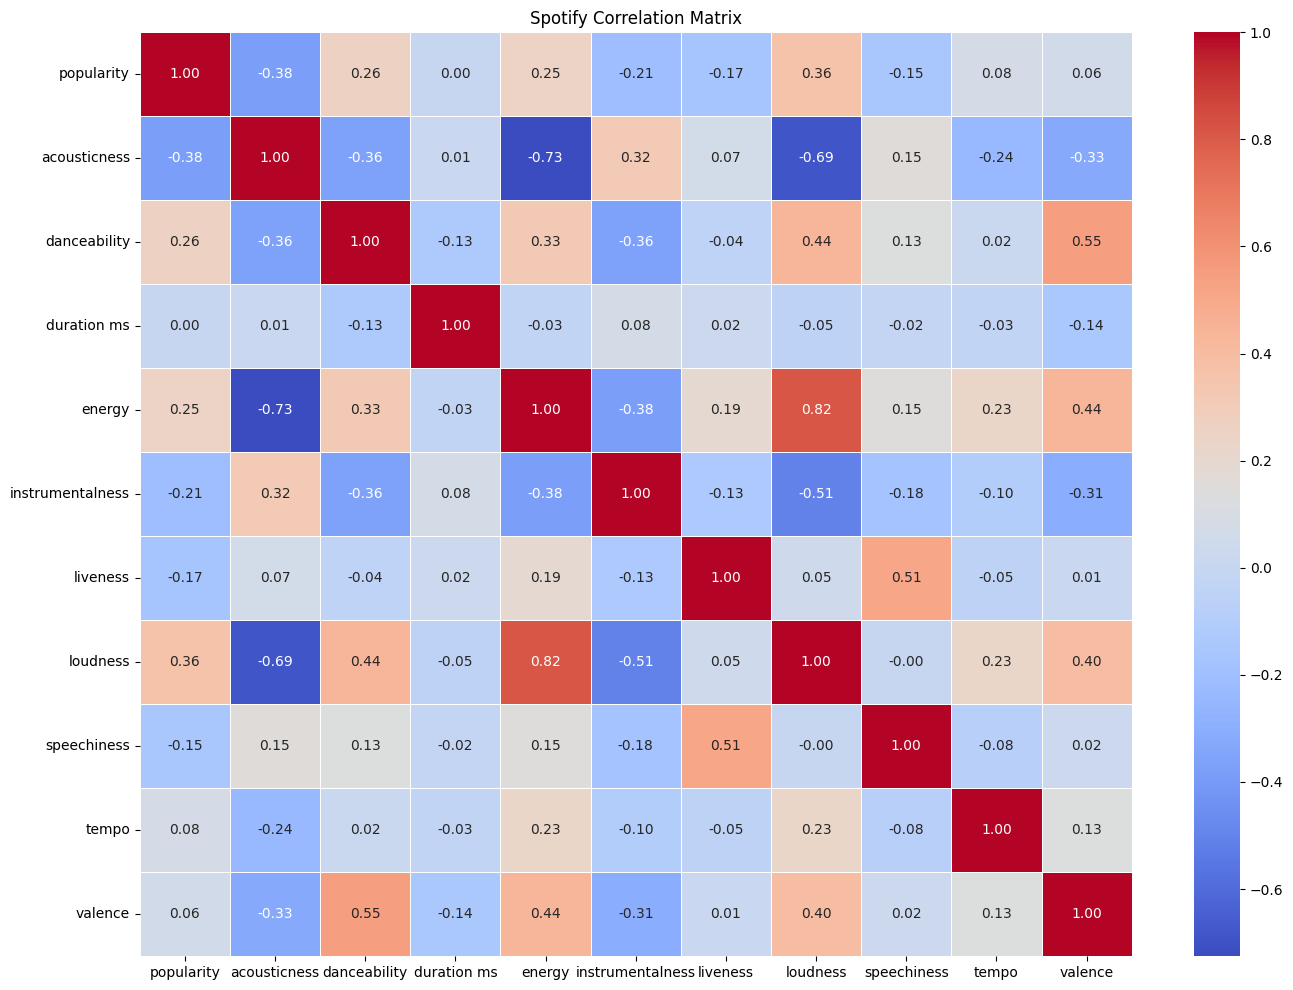

In [13]:
correlation_matrix = df_tracks.corr(numeric_only=True)
plt.figure(figsize=(16,12))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths = 0.5)
plt.title('Spotify Correlation Matrix')
plt.show()

# Analyzing the Top 10 Most Popular Songs on Spotify

In [14]:
most_popular=df_tracks.query('popularity>90',inplace=False).sort_values('popularity',ascending=False)
most_popular[:10]

,genre,artist name,track name,track id,popularity,acousticness,danceability,duration ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time signature,valence
107804,Pop,Ariana Grande,7 rings,14msK75pk3pA33pzPVNtBF,100,0.5780,0.725,178640,0.321,0.000000,C#,0.0884,-10.744,Minor,0.3230,70.142,04-Apr,0.319
9027,Dance,Ariana Grande,7 rings,14msK75pk3pA33pzPVNtBF,100,0.5780,0.725,178640,0.321,0.000000,C#,0.0884,-10.744,Minor,0.3230,70.142,04-Apr,0.319
9026,Dance,Ariana Grande,"break up with your girlfriend, i'm bored",4kV4N9D1iKVxx1KLvtTpjS,99,0.0421,0.726,190440,0.554,0.000000,F,0.1060,-5.290,Minor,0.0917,169.999,04-Apr,0.335
86951,Rap,Post Malone,Wow.,6MWtB6iiXyIwun0YzU6DFP,99,0.1630,0.833,149520,0.539,0.000002,B,0.1010,-7.399,Minor,0.1780,99.947,04-Apr,0.385
107803,Pop,Post Malone,Wow.,6MWtB6iiXyIwun0YzU6DFP,99,0.1630,0.833,149520,0.539,0.000002,B,0.1010,-7.399,Minor,0.1780,99.947,04-Apr,0.385
107802,Pop,Ariana Grande,"break up with your girlfriend, i'm bored",4kV4N9D1iKVxx1KLvtTpjS,99,0.0421,0.726,190440,0.554,0.000000,F,0.1060,-5.290,Minor,0.0917,169.999,04-Apr,0.335
138918,Reggaeton,Daddy Yankee,Con Calma,5w9c2J52mkdntKOmRLeM2m,98,0.1100,0.737,193227,0.860,0.000002,G#,0.0574,-2.652,Minor,0.0593,93.989,04-Apr,0.656
66643,Hip-Hop,Daddy Yankee,Con Calma,5w9c2J52mkdntKOmRLeM2m,98,0.1100,0.737,193227,0.860,0.000002,G#,0.0574,-2.652,Minor,0.0593,93.989,04-Apr,0.656
107909,Pop,Daddy Yankee,Con Calma,5w9c2J52mkdntKOmRLeM2m,98,0.1100,0.737,193227,0.860,0.000002,G#,0.0574,-2.652,Minor,0.0593,93.989,04-Apr,0.656
86953,Rap,Post Malone,Sunflower - Spider-Man: Into the Spider-Verse,3KkXRkHbMCARz0aVfEt68P,97,0.5560,0.760,158040,0.479,0.000000,D,0.0703,-5.574,Major,0.0466,89.911,04-Apr,0.913


# Analyzing the Correlation Between Loudness and Energy in Spotify Tracks

[Text(0.5, 1.0, 'Loudness Vs Energy correlation')]

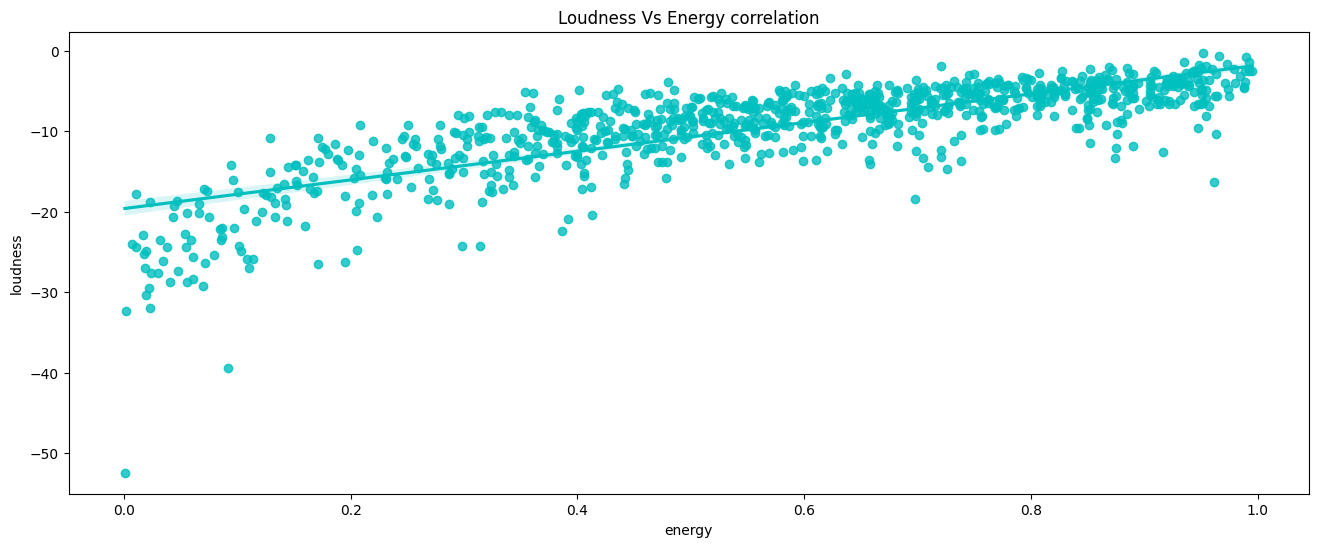

In [15]:
sample_df=df_tracks.sample(int(0.004*len(df_tracks)))
plt.figure(figsize=(16,6))
sns.regplot(data=sample_df,y="loudness",x="energy",color="c").set(title="Loudness Vs Energy correlation")

# Exploring the Relationship Between Acousticness and Popularity in Spotify Songs

[Text(0.5, 1.0, 'Popularity Vs Acousticness Correlation')]

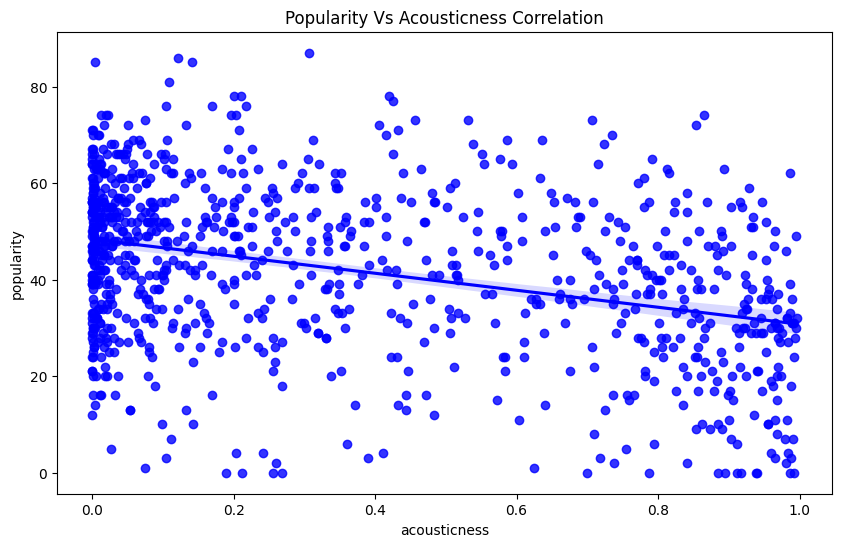

In [16]:
plt.figure(figsize=(10,6))
sns.regplot(data=sample_df,y="popularity",x="acousticness",color="b").set(title="Popularity Vs Acousticness Correlation") 

# Average Danceability by Genre

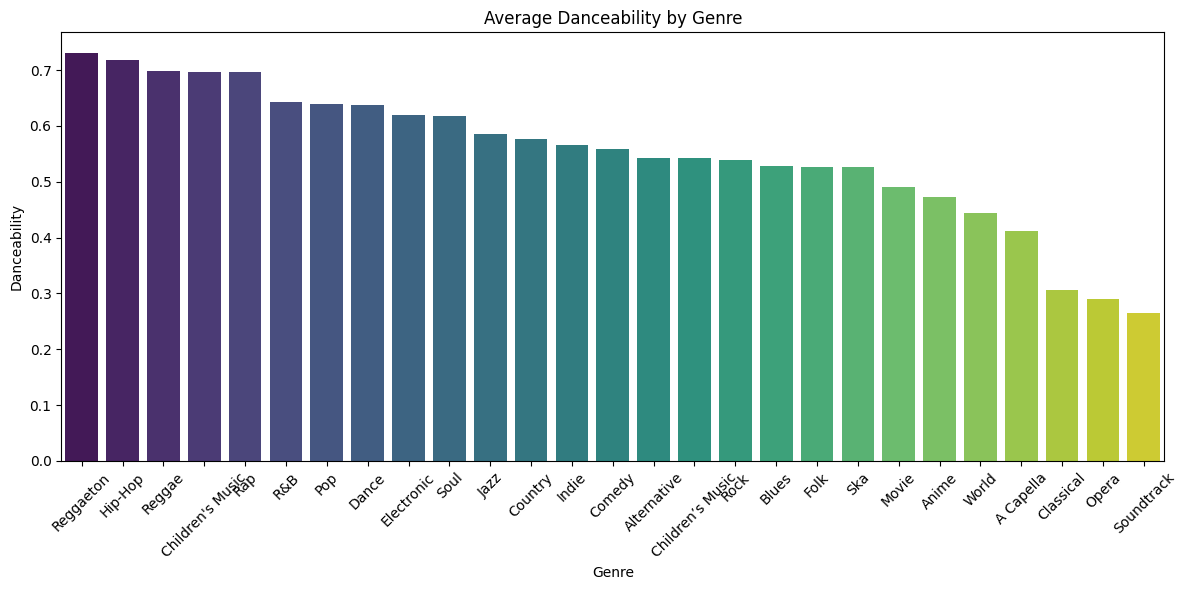

In [22]:
# Convert series to DataFrame
df_genre_danceability = genre_danceability.reset_index()
df_genre_danceability.columns = ['genre', 'danceability']
df_genre_danceability['hue'] = df_genre_danceability['genre']  # just to satisfy Seaborn's requirement

plt.figure(figsize=(12, 6))
sns.barplot(data=df_genre_danceability, x='genre', y='danceability', hue='hue', palette='viridis', legend=False)
plt.xticks(rotation=45)
plt.title('Average Danceability by Genre')
plt.xlabel('Genre')
plt.ylabel('Danceability')
plt.tight_layout()
plt.show()


# Average Audio Features Across Popularity Levels

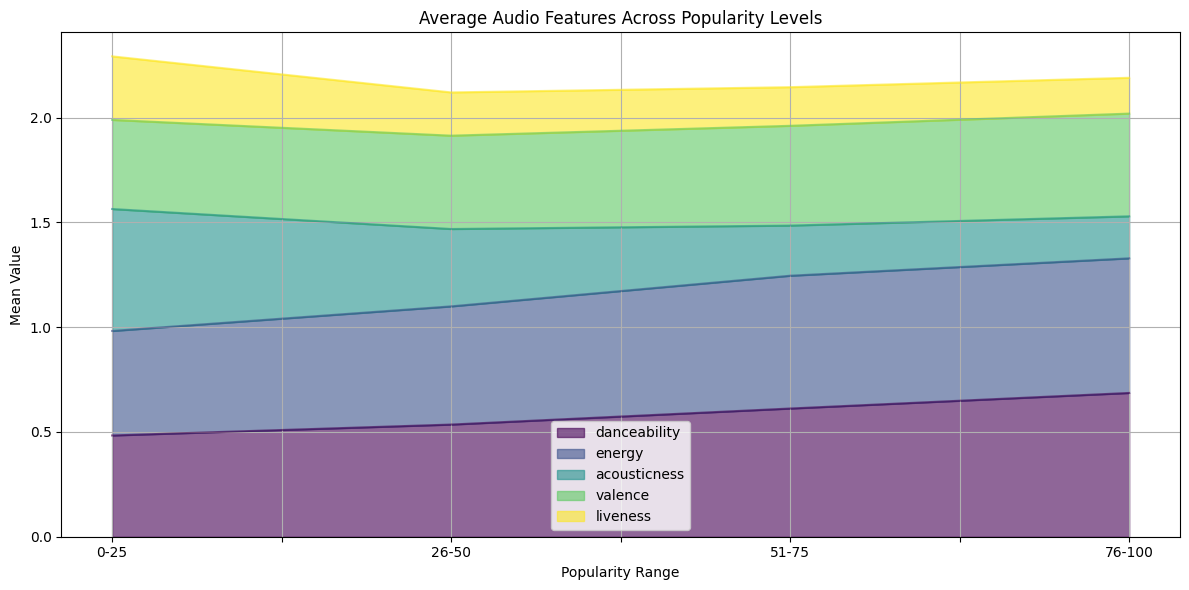

In [24]:
# Step 1: Create popularity bins
df_tracks['popularity_bin'] = pd.cut(df_tracks['popularity'], bins=[0,25,50,75,100],
                                     labels=['0-25', '26-50', '51-75', '76-100'])

# Step 2: Group by popularity bin and calculate mean of features
grouped = df_tracks.groupby('popularity_bin', observed=True)[['danceability', 'energy', 'acousticness', 'valence', 'liveness']].mean()

# Step 3: Plot area chart
grouped.plot(kind='area', figsize=(12, 6), colormap='viridis', alpha=0.6)
plt.title('Average Audio Features Across Popularity Levels')
plt.ylabel('Mean Value')
plt.xlabel('Popularity Range')
plt.grid(True)
plt.tight_layout()
plt.show()
